# Setup

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

import pandas as pd
import geopandas as gpd

import sys
sys.path.append("../src")

import usa_data_Tij as USA_data
import indices
from parameters import params_default
#del sys.modules['dynamics']
from dynamics import Dynamics

In [3]:
import importlib
#importlib.reload(USdata)

In [3]:
#T0_total, counties_pop, counties_in_state, states_in_division = USA_data.compute_Tij_from_data()

In [4]:
(census, counties_census, states_census, commuting, counties_FIPS, states_FIPS, divisions_FIPS, countyFIPS_to_index,
statesFIPS_to_index, divisionsFIPS_to_index, index_to_countyFIPS, index_to_statesFIPS, index_to_divisionsFIPS,
USstates, USdivisions, counties_pop, states_pop, divisions_pop, counties_in_state, states_in_division,
n_counties, commuting_matrix, citytocounty, faatravel, airport_enplane, Ftravelers_matrix, mod_airport_enplane,
mod_airport_arrivals, mobility_matrix, counties_realpop, frac_mobilers, frac_pop, T0_total) = USA_data.compute_Tij_from_data(output='all')

/Users/asierpini40/Documents/Projects/NECSI_EpidemicModeling/Code/notebooks/../src/usa_data_Tij.py:280: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  commuting['Index FIPS residency'] = commuting['FIPS residency'].replace(countyFIPS_to_index)  # inplace=True
/Users/asierpini40/Documents/Projects/NECSI_EpidemicModeling/Code/notebooks/../src/usa_data_Tij.py:281: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  commuting['Index FIPS work'] = commuting['FIPS work'].replace(countyFIPS_to_index)   # inplace=True
/Users/asierpini40/Document

In [6]:
N, Ntots = indices.set_N_arrays (counties_pop, counties_in_state, states_in_division)
ichild = indices.set_ichild_arrays(N, Ntots, counties_in_state, states_in_division)
iparent = indices.set_iparent_arrays (N, Ntots, ichild)

# Importing Maps

In [7]:
folder_geodata = '../data/geodata'

## Counties

In [310]:
gdf_counties = gpd.read_file('%s/US_counties_geo/cb_2021_us_county_500k.shp'%(folder_geodata))

# Remove states like Virgin Islands and Puerto Rico
gdf_counties = gdf_counties[gdf_counties["STATEFP"].isin(USstates['FIPS'])]

gdf_counties['FIPS'] = gdf_counties['STATEFP']+gdf_counties['COUNTYFP']

# Check which counties from geofile are not in the counties_FIPS list we're using
print(gdf_counties[ ~gdf_counties['FIPS'].isin(counties_FIPS) ])

# Check which counties in our counties_FIPS list are not in geofile
UScounties_FIPS = counties_census.loc[:,'STATE'] + counties_census.loc[:,'COUNTY']
print(counties_census[ ~UScounties_FIPS.isin(gdf_counties['FIPS'])  ])

# Order gdf_counties in the same order as population arrays
ref = UScounties_FIPS.to_numpy()
test = gdf_counties['FIPS'].to_numpy()
ordering = [ np.argwhere(ref[ii]==test)[0,0] for ii in range(len(ref)) ]
gdf_counties = gdf_counties.iloc[ordering,:]

# Define a simplified map without Hawaii and Alaska
gdf_counties_simple = gdf_counties[~gdf_counties["STATEFP"].isin(['02','15'])]

# Order gdf_counties_simple in the same order as population arrays
ref = UScounties_FIPS[~counties_census['STATE'].isin(['02','15'])].to_numpy()
test = gdf_counties_simple['FIPS'].to_numpy()
ordering = [ np.argwhere(ref[ii]==test)[0,0] for ii in range(len(ref)) ]
gdf_counties_simple = gdf_counties_simple.iloc[ordering,:]

Empty GeoDataFrame
Columns: [STATEFP, COUNTYFP, COUNTYNS, AFFGEOID, GEOID, NAME, NAMELSAD, STUSPS, STATE_NAME, LSAD, ALAND, AWATER, geometry, FIPS]
Index: []
Empty DataFrame
Columns: [REGION, DIVISION, STATE, COUNTY, STNAME, CTYNAME, POPULATION, FIPS]
Index: []


## States

In [9]:
gdf_states = gpd.read_file('%s/US_states_geo/cb_2022_us_state_500k.shp'%(folder_geodata))

# Remove: American Samoa, Puerto Rico, United States Virgin Islands,
#         Guam, and Commonwealth of the Northern Mariana Islands
gdf_states = gdf_states[gdf_states['STATEFP'].isin(USstates['FIPS'])]
#gdf_states = gdf_states[~gdf_states["STATEFP"].isin(['60','72','78','66','69'])]

# Check which states from geofile are not in the states_FIPS list we're using
print(gdf_states[ ~gdf_states['STATEFP'].isin(states_FIPS) ])

# Check which states in our states_FIPS list are not in geofile
USstates_FIPS = states_census.loc[:,'STATE']
print(states_census[ ~USstates_FIPS.isin(gdf_states['STATEFP'])  ])

# Order gdf in the same order as population arrays
ref = USstates_FIPS.to_numpy()
test = gdf_states['STATEFP'].to_numpy()
ordering = [ np.argwhere(ref[ii]==test)[0,0] for ii in range(len(ref)) ]
gdf_states = gdf_states.iloc[ordering,:]

# Define a simplified map without Hawaii and Alaska
gdf_states_simple = gdf_states[~gdf_states['STATEFP'].isin(['02','15'])]
gdf_states_simple_wAK = gdf_states[~gdf_states['STATEFP'].isin(['15'])]

# Order gdf_states_simple in the same order as population arrays
ref = USstates_FIPS[~states_census['STATE'].isin(['02','15'])].to_numpy()
test = gdf_states_simple['STATEFP'].to_numpy()
ordering = [ np.argwhere(ref[ii]==test)[0,0] for ii in range(len(ref)) ]
gdf_states_simple = gdf_states_simple.iloc[ordering,:]

Empty GeoDataFrame
Columns: [STATEFP, STATENS, AFFGEOID, GEOID, STUSPS, NAME, LSAD, ALAND, AWATER, geometry]
Index: []
Empty DataFrame
Columns: [REGION, DIVISION, STATE, COUNTY, STNAME, CTYNAME, POPULATION, FIPS]
Index: []


## Divisions

In [10]:
gdf_divisions = gpd.read_file('%s/US_divisions_geo/cb_2022_us_division_500k.shp'%(folder_geodata))

# FIPS of divisions
USdivisions_FIPS = divisions_FIPS

# Order gdf_divisions in the same order as division arrays
ref = USdivisions_FIPS
test = gdf_divisions['DIVISIONCE'].to_numpy()
ordering = [ np.argwhere(ref[ii]==test)[0,0] for ii in range(len(ref)) ]
gdf_divisions = gdf_divisions.iloc[ordering,:]

# Create dataframe of division of states without Alaska and Hawaii
division_of_states = states_census['DIVISION']
division_of_states_simple = division_of_states[~states_census['STATE'].isin(['02','15'])]

# Add division to states geodata
gdf_states_simple['DIVISION'] = division_of_states_simple.to_numpy()

# Merge states of same division
gdf_divisions_simple = gdf_divisions.copy()

for ii in range(len(USdivisions_FIPS)):
    
    states_in_division_ii = (gdf_states_simple['DIVISION'] == USdivisions_FIPS[ii])
    poly_division_ii = gdf_states_simple[states_in_division_ii]['geometry'].unary_union
    
    position_ii = (gdf_divisions_simple['DIVISIONCE'] == USdivisions_FIPS[ii])
    gdf_divisions_simple['geometry'][position_ii] = poly_division_ii


#gdf_divisions_simple.plot()

/var/folders/7t/g1b7g0zj5s301l_f031jgw6r0000gn/T/ipykernel_1934/3965759539.py:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  gdf_divisions_simple['geometry'][position_ii] = poly_division_ii
/var/folders/7t/g1b7g0zj5s301l_f031jgw6r0000gn/T

## Countries and World

In [11]:
gdf_world = gpd.read_file('%s/World_countries_geo/ne_10m_admin_0_countries.shp'%(folder_geodata))
#gdf_mexico_states = gpd.read_file('%s/MX_states_geo/mex_admbnda_adm1_govmex_20210618.shp'%(folder_geodata))
#gdf_canada_states = gpd.read_file('%s/Canada_states_geo/lpr_000b16a_e.shp'%(folder_geodata))

gdf_world = gdf_world.to_crs('EPSG:4269')
#gdf_mexico_states = gdf_mexico_states.to_crs('EPSG:4269')
#gdf_canada_states = gdf_canada_states.to_crs('EPSG:4269')

#gdf_world_continents = gpd.read_file('%s/World_continents_geo/World_Continents.shp'%(folder_geodata))

## Less accuracy maps

In [12]:
# To decrease size of images generated
#gdf_canada_states_lessacc = gdf_canada_states.copy()
#gdf_canada_states_lessacc['geometry'] = gdf_canada_states['geometry'].simplify(tolerance=0.1)

#gdf_mexico_states_lessacc = gdf_mexico_states.copy()
#gdf_mexico_states_lessacc['geometry'] = gdf_mexico_states['geometry'].simplify(tolerance=0.1)

gdf_states_simple_lessacc = gdf_states_simple.copy()
gdf_states_simple_lessacc['geometry'] = gdf_states_simple['geometry'].simplify(tolerance=0.1)

gdf_counties_simple_lessacc = gdf_counties_simple.copy()
gdf_counties_simple_lessacc['geometry'] = gdf_counties_simple['geometry'].simplify(tolerance=0.1)

gdf_world_lessacc = gdf_world.copy()
gdf_world_lessacc['geometry'] = gdf_world['geometry'].simplify(tolerance=0.1)

#gdf_world_continents_lessacc = gdf_world_continents.copy()
#gdf_world_continents_lessacc['geometry'] = gdf_world_continents['geometry'].simplify(tolerance=0.1)

# Plots

In [13]:
outputfolder='../plots/fig3_elimination'

## Simulation

[1000  429  184  112   31   14    2    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


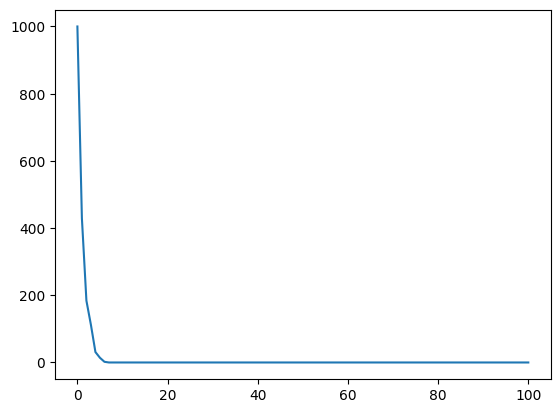

In [21]:
params = params_default.copy()
params['Nt'] = 100
params['seed'] = 1000
params['random_seed'] = 232323

params['distrib'] = 'neg_binomial'
params['sspread'] = 2
params['beta'] = 2

params['PolicyChoice'] = '1scale'
params['mpol1'] = 4
params['mpol2'] = 4
params['GtoRthreshold'] = 6
params['reductionLocal'] = 5
params['reductionTravel'] = 5

params1 = params.copy()

system1 = Dynamics(N, Ntots, ichild, iparent, T0_total, **params)
system1.compute_dynamics()

print(system1.obs.NItot)

plt.plot(system1.obs.NItot)
plt.show()


[1000 1518 1605 1423 1032  760  686  508  359  196  265  151  140  109
   66   54   27   31   20   33   25   13   20   13   17    4    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


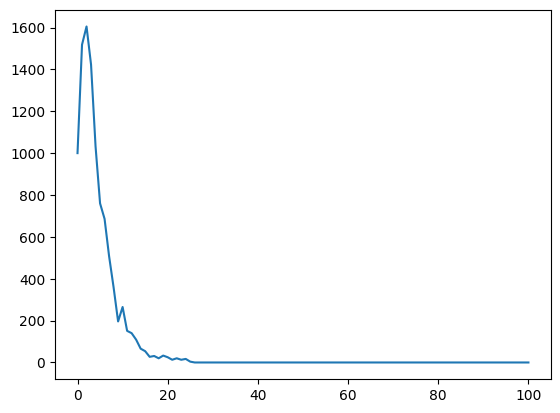

In [20]:
params = params_default.copy()
params['Nt'] = 100
params['seed'] = 1000
params['random_seed'] = 232323

params['distrib'] = 'neg_binomial'
params['sspread'] = 2
params['beta'] = 2

params['PolicyChoice'] = '1scale'
params['mpol1'] = 1
params['mpol2'] = 2
params['GtoRthreshold'] = 6
params['reductionLocal'] = 5
params['reductionTravel'] = 5

params2 = params.copy()

system2 = Dynamics(N, Ntots, ichild, iparent, T0_total, **params)
system2.compute_dynamics()

print(system2.obs.NItot)

plt.plot(system2.obs.NItot)
plt.show()


[1000  501  238  124   56   24   12   25    6    3    2    1    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


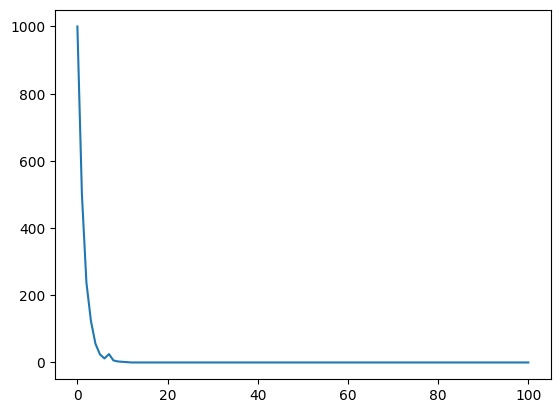

In [25]:
params = params_default.copy()
params['Nt'] = 100
params['seed'] = 1000
params['random_seed'] = 232323

params['distrib'] = 'neg_binomial'
params['sspread'] = 2
params['beta'] = 2

params['PolicyChoice'] = '1scale'
params['mpol1'] = 2
params['mpol2'] = 2
params['GtoRthreshold'] = 6
params['reductionLocal'] = 5
params['reductionTravel'] = 5

params3A = params.copy()

system3A = Dynamics(N, Ntots, ichild, iparent, T0_total, **params)
system3A.compute_dynamics()

print(system3A.obs.NItot)

plt.plot(system3A.obs.NItot)
plt.show()


[1000 1498 1535 1271  836  552  416  314  162   99   54   38   32   31
   27   10    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


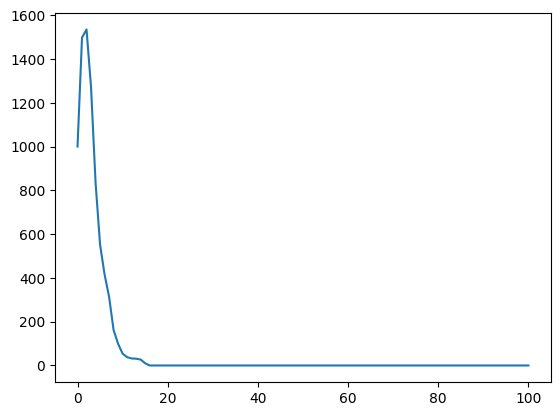

In [24]:
params = params_default.copy()
params['Nt'] = 100
params['seed'] = 1000
params['random_seed'] = 232323

params['distrib'] = 'neg_binomial'
params['sspread'] = 2
params['beta'] = 2

params['PolicyChoice'] = '2scales'
params['mpol1'] = 1
params['mpol2'] = 2
params['GtoRthreshold'] = 6
params['reductionLocal'] = 5
params['reductionTravel'] = 5

params3B = params.copy()

system3B = Dynamics(N, Ntots, ichild, iparent, T0_total, **params)
system3B.compute_dynamics()

print(system3B.obs.NItot)

plt.plot(system3B.obs.NItot)
plt.show()


## Plot function

In [131]:
def plot_usa_map_series(data, times, gdf_simple, export=False, filename='map', output_folder='.', append='',
                        data_name='data', title='', n_colors=10000, figsize=[10, 4], cmap_default='viridis',
                        zerocolor='white', font_size=14, level='county', n_cols=5, coldown=0, colup=1, lw=0.2):
    
    n_times, n_regions = data.shape
    vmax = np.max(data)
    
    # Remove Alaska and Hawaii from infected
    if level == 'county':
        data_no_AK = data[:,~counties_census['STATE'].isin(['02', '15'])]
    elif level == 'state':
        data_no_AK = data[:,~states_census['STATE'].isin(['02', '15'])]
    elif level == 'division':
        data_no_AK = data
    elif level == 'country':
        data_no_AK = data
    else:
        raise ValueError(f"Invalid level: {level}")
    
    # Make a copy to not modify input gdf
    gdf_simple = gdf_simple.copy()
    
    # Color Map with 0 being a different color (viridis, RdBu, Reds)
    cmap = mpl.colormaps.get_cmap(cmap_default).copy()
    cmap = mpl.colors.ListedColormap(cmap(np.linspace(0, 1, n_colors)))  # Set number of colors
    cmap_list = [cmap(i) for i in range(int(cmap.N*coldown),int(cmap.N*colup))]
    cmap_list[0] = zerocolor
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmap_list, cmap.N)
    
    #n_rows = -(-n_times//n_cols) # Ceiling division
    n_rows = 1
    figsize = [figsize[0],n_rows*figsize[1]]
    plt.rcParams.update({'font.size': 14})
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    for i in range(n_times):
        
        #row = i//n_cols
        col = i%n_cols
        
        #axs[col].set_ylim([gdf_simple['geometry'].bounds['miny'].min(),
        #                 gdf_simple['geometry'].bounds['maxy'].max()])
        
        # Set limits by hand
        axs[col].set_xlim(left=-126,right=-65)
        #axs[col].set_xlim(left=-124.763068,right=-66.949895)
        axs[col].set_ylim(bottom=24,top=50)
        #axs[col].set_ylim(bottom=24.521304,top=49.384358)

        axs[col].set_axis_off()        
        
        #axs[col].set_title(f't={times[i]}', fontsize=font_size)
        
        data_row = data_no_AK[i, :]
        gdf_simple[data_name] = data_row
        
        gdf_simple.plot(data_name, ax=axs[col], cmap=cmap, edgecolor='k', linewidth=lw,
                        vmin=0, vmax=vmax, rasterized=True)
        
        #axs[col].set_aspect('equal')
        axs[col].set_aspect(1.3)
        
    # Remove content from extra subplots if there are more subplots than data sets
    if n_times < n_rows * n_cols:
        for i in range(n_times, n_rows * n_cols):
            #row = i // n_cols
            col = i % n_cols
            axs[col].axis('off')

        
    # Add the colorbar legend on top of the first subplot
    #cbar_ax = fig.add_axes([0.35, 0.88, 0.4, 0.02])   # top bar
    #cbar = fig.colorbar(axs[0].collections[0], cax=cbar_ax, orientation='horizontal')
    #cbar.ax.xaxis.tick_top()  # Move the ticks to the top
    cbar_ax = fig.add_axes([0.9, 0.3, 0.01, 0.4])   # top bar
    cbar = fig.colorbar(axs[-1].collections[0], cax=cbar_ax)
    cbar.ax.set_ylabel(r'$N_I$', labelpad=10, rotation=0, ha='right')
    cbar.set_ticks([axs[-1].collections[0].get_clim()[0], axs[-1].collections[0].get_clim()[1]])
    
    # Exclude colorbar axes from tight_layout
    #plt.tight_layout(rect=[0, 0, 0.9, 1])
    
    # Manually adjust the layout
    plt.subplots_adjust(right=0.9, wspace=0, hspace=0)  # Adjust the right margin to make space for the colorbar
    #plt.subplots_adjust(top=0.8, wspace=0)   # For top bar
    
    if export:
        plt.savefig(fname=f'{output_folder}/{filename}{append}.pdf', dpi=200)
    
    plt.show()

In [187]:
def plot_usa_map_series_binary(data, times, gdf_simple, export=False, filename='map', output_folder='.', append='',
                        data_name='data', title='', figsize=[10, 4], color0='green', color1='red', colormid='orange',
                        font_size=14, level='county', n_cols=5, lw=0.2, label0='Green', label1='Red'):
    
    n_times, n_regions = data.shape
    vmax = np.max(data)
    
    # Remove Alaska and Hawaii from infected
    if level == 'county':
        data_no_AK = data[:,~counties_census['STATE'].isin(['02', '15'])]
    elif level == 'state':
        data_no_AK = data[:,~states_census['STATE'].isin(['02', '15'])]
    elif level == 'division':
        data_no_AK = data
    elif level == 'country':
        data_no_AK = data
    else:
        raise ValueError(f"Invalid level: {level}")

    # Make a copy to not modify input gdf
    gdf_simple = gdf_simple.copy()
    
    #cmap = colors.ListedColormap([(color0[0], color0[1], color0[2], alpha0),  # color0 with adjusted alpha
    #                              (color1[0], color1[1], color1[2], alpha1)])  # color1 with adjusted alpha

    
    # Color map
    cmap = colors.ListedColormap([color0, colormid, color1])
    bounds = [-0.5, 0.25, 0.75, 1.5]  # Specify the boundaries for the colorbar ticks
    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    n_rows = -(-n_times//n_cols) # Ceiling division
    figsize = [figsize[0],n_rows*figsize[1]]
    plt.rcParams.update({'font.size': 14})
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    for i in range(n_times):
        
        #row = i//n_cols # + 1  ## +1 because of legend subplot
        col = i%n_cols

        # Set limits by hand
        axs[col].set_xlim(left=-126,right=-65)
        #axs[col].set_xlim(left=-124.763068,right=-66.949895)
        axs[col].set_ylim(bottom=24,top=50)
        #axs[col].set_ylim(bottom=24.521304,top=49.384358)

        axs[col].set_axis_off()   
        
        #axs[col].set_title(f't={times[i]}', fontsize=font_size)
        
        data_row = data_no_AK[i, :]
        gdf_simple[data_name] = data_row
        
        gdf_simple.plot(data_name, ax=axs[col], cmap=cmap, edgecolor='k', linewidth=lw,
                        vmin=0, vmax=vmax, rasterized=True)
        
        axs[col].set_aspect(1.3)

    # Remove content from extra subplots if there are more subplots than data sets
    if n_times < n_rows * n_cols:
        for i in range(n_times, n_rows * n_cols):
            #row = i // n_cols
            col = i % n_cols
            axs[col].axis('off')

    # Add the colorbar legend on top of the first subplot
    #cbar_ax = fig.add_axes([0.35, 0.88, 0.4, 0.02])   # top bar
    #cbar = fig.colorbar(axs[0].collections[0], cax=cbar_ax, orientation='horizontal')
    #cbar.ax.xaxis.tick_top()  # Move the ticks to the top
    cbar_ax = fig.add_axes([0.9, 0.3, 0.01, 0.4])   # top bar
    cbar = fig.colorbar(axs[-1].collections[0], cax=cbar_ax)
    cbar.ax.set_ylabel("P", labelpad=10, rotation=0, ha='right')
    cbar.set_ticks([axs[-1].collections[0].get_clim()[0], axs[-1].collections[0].get_clim()[1]])

    # Legend
    # legend_handles = [mpl.patches.Patch(color=color0, label=label0),
    #                   mpl.patches.Patch(color=color1, label=label1)]
    # axs[0, n_cols//2].legend(handles=legend_handles, loc='center', bbox_to_anchor=(0.5, 1.6), ncol=2)
    
    # Manually adjust the layout
    #plt.subplots_adjust(right=0.83)  # Adjust the right margin to make space for the colorbar
    plt.subplots_adjust(top=0.9, wspace=0)   # For top bar
    
    if export:
        plt.savefig(fname=f'{output_folder}/{filename}{append}.pdf', dpi=200)
    
    plt.show()

# Plots

In [295]:
times_toplot = np.array([0,2,4,6,12,18,24,30])

green_color = 'lightgreen'    # darkgreen | lightgreen
red_color = 'red'     # lightcoral | red
orange_color = 'gold'

zerocolor = 'black'     # white | black
cmap = 'hot'      # inferno | hot | Reds
cdown = 0.2
cup = 0.8

## Plot Option 1

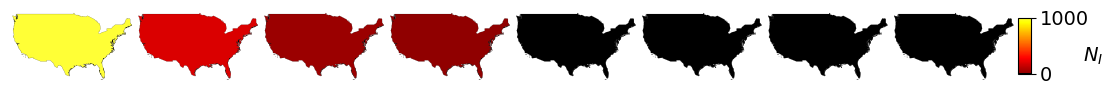

In [296]:
export_file = True
filename = 'Opt1_cases30'
append = ''

# Data
data = system1.obs.NI[4][times_toplot,:]

select_usa = (gdf_world['SOVEREIGNT']=='United States of America') & (gdf_world['TYPE']=='Country')

plot_usa_map_series(data, times_toplot, gdf_world[select_usa], level='country',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, cmap_default=cmap, zerocolor=zerocolor, figsize=[13,1.4],
                    n_cols=8, coldown=cdown, colup=cup, lw=0.1)

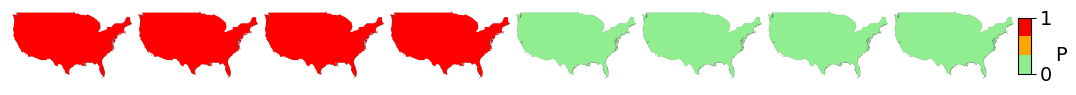

In [297]:
export_file = True
filename = 'Opt1_policy30'
append = ''

# Data
data = system1.obs.policy[1][times_toplot,:]

select_usa = (gdf_world['SOVEREIGNT']=='United States of America') & (gdf_world['TYPE']=='Country')

plot_usa_map_series_binary(data, times_toplot, gdf_world[select_usa], level='country',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, color0=green_color, color1=red_color, figsize=[13,1.4],
                    n_cols=8, lw=0.05)

## Plot Option 2

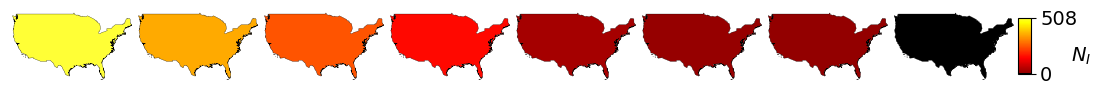

In [298]:
export_file = True
filename = 'Opt2_cases31'
append = ''

# Data
data = np.sum(system2.obs.NI[1][times_toplot,:]>0, axis=1).reshape((-1,1))

select_usa = (gdf_world['SOVEREIGNT']=='United States of America') & (gdf_world['TYPE']=='Country')

plot_usa_map_series(data, times_toplot, gdf_world[select_usa], level='country',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, cmap_default=cmap, zerocolor=zerocolor, figsize=[13,1.4],
                    n_cols=8, coldown=cdown, colup=cup)

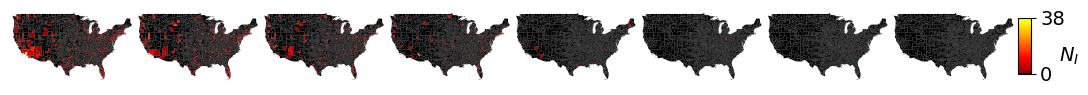

In [299]:
export_file = True
filename = 'Opt2_cases10'
append = ''

# Data
data = system2.obs.NI[1][times_toplot,:]

plot_usa_map_series(data, times_toplot, gdf_counties_simple_lessacc, level='county',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, cmap_default=cmap, zerocolor=zerocolor, figsize=[13,1.4],
                    n_cols=8, coldown=cdown, colup=cup, lw=0.05)

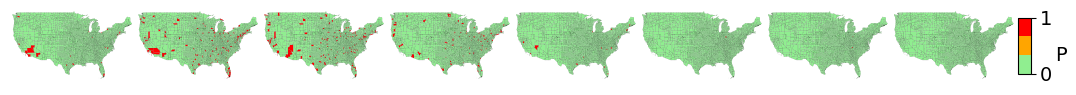

In [300]:
export_file = True
filename = 'Opt2_policy10'
append = ''

# Data
data = system2.obs.policy[1][times_toplot,:]

plot_usa_map_series_binary(data, times_toplot, gdf_counties_simple_lessacc, level='county',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, color0=green_color, color1=red_color, figsize=[13,1.4],
                    n_cols=8, lw=0.05)

## Plot Option 3A

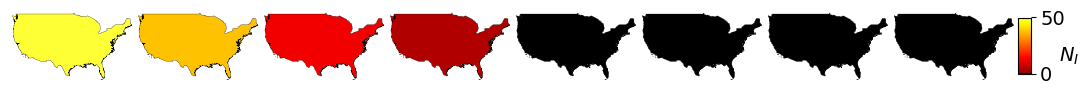

In [301]:
export_file = True
filename = 'Opt3A_cases32'
append = ''

# Data
data = np.sum(system3A.obs.NI[2][times_toplot,:]>0, axis=1).reshape((-1,1))

select_usa = (gdf_world['SOVEREIGNT']=='United States of America') & (gdf_world['TYPE']=='Country')

plot_usa_map_series(data, times_toplot, gdf_world[select_usa], level='country',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, cmap_default=cmap, zerocolor=zerocolor, figsize=[13,1.4],
                    n_cols=8, coldown=cdown, colup=cup)

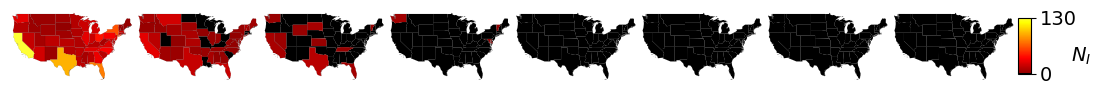

In [302]:
export_file = True
filename = 'Opt3A_cases20'
append = ''

# Data
data = system3A.obs.NI[2][times_toplot,:]

plot_usa_map_series(data, times_toplot, gdf_states_simple_lessacc, level='state',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, cmap_default=cmap, zerocolor=zerocolor, figsize=[13,1.4],
                    n_cols=8, coldown=cdown, colup=cup, lw=0.05)

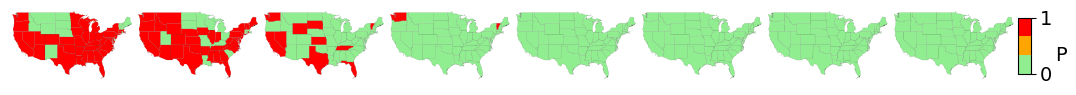

In [303]:
export_file = True
filename = 'Opt3A_policy20'
append = ''

# Data
data = system3A.obs.policy[1][times_toplot,:]

plot_usa_map_series_binary(data, times_toplot, gdf_states_simple_lessacc, level='state',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, color0=green_color, color1=red_color, figsize=[13,1.4],
                    n_cols=8, lw=0.05)

# Plot Option 3B

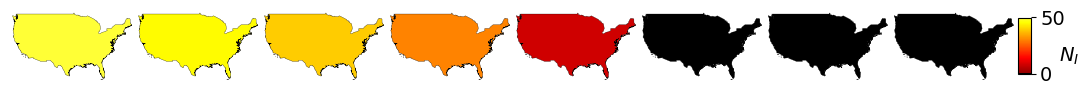

In [304]:
export_file = True
filename = 'Opt3B_cases32'
append = ''

# Data
data = np.sum(system3B.obs.NI[2][times_toplot,:]>0, axis=1).reshape((-1,1))

select_usa = (gdf_world['SOVEREIGNT']=='United States of America') & (gdf_world['TYPE']=='Country')

plot_usa_map_series(data, times_toplot, gdf_world[select_usa], level='country',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, cmap_default=cmap, zerocolor=zerocolor, figsize=[13,1.4],
                    n_cols=8, coldown=cdown, colup=cup)

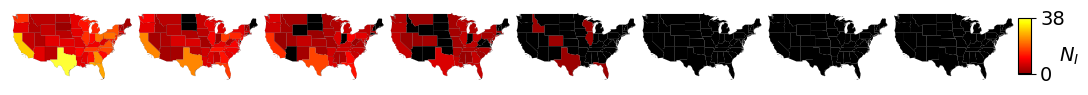

In [305]:
export_file = True
filename = 'Opt3B_cases21'
append = ''

# Data
temp = system3B.obs.NI[1][times_toplot,:]>0
data = np.zeros((len(times_toplot), Ntots[2]))
for ss in range(Ntots[2]):
    data[:,ss] = np.sum(temp[:,ichild[(2,1)][ss]], axis=1)

plot_usa_map_series(data, times_toplot, gdf_states_simple_lessacc, level='state',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, cmap_default=cmap, zerocolor=zerocolor, figsize=[13,1.4],
                    n_cols=8, coldown=cdown, colup=cup, lw=0.05)

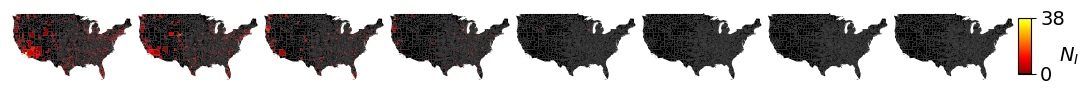

In [306]:
export_file = True
filename = 'Opt3B_cases10'
append = ''

# Data
data = system3B.obs.NI[1][times_toplot,:]

plot_usa_map_series(data, times_toplot, gdf_counties_simple_lessacc, level='county',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, cmap_default=cmap, zerocolor=zerocolor, figsize=[13,1.4],
                    n_cols=8, coldown=cdown, colup=cup, lw=0.05)

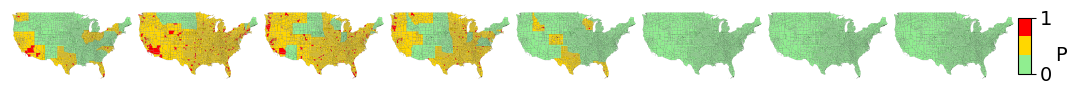

In [307]:
export_file = True
filename = 'Opt3B_policy210'
append = ''

# Data
data = system3B.obs.policy[1][times_toplot,:]
datamid = system3B.obs.policy[2][times_toplot,:]

for ss in range(Ntots[2]):
    data[:,ichild[(2,1)][ss]] += datamid[:,ss].reshape(-1,1)
data = data/2

plot_usa_map_series_binary(data, times_toplot, gdf_counties_simple_lessacc, level='county',
                    export=export_file, filename=filename, append=append,
                    output_folder=outputfolder, color0=green_color, color1=red_color, colormid=orange_color, figsize=[13,1.4],
                    n_cols=8, lw=0.05)